In [190]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [191]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta


# Reflect Tables into SQLAlchemy ORM

In [192]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [193]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [194]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [195]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

['measurement', 'station']

In [196]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [197]:
# Create our session (link) from Python to the DB
Session = Session(engine)


# Exploratory Precipitation Analysis

In [198]:
# Find the most recent date in the data set.

#df = pd.DataFrame()
##df['StartDate'] = pd.to_datetime(df['StartDate'])
#least_recent_date = df['StartDate'].min()
#most_recent_date = df['StartDate'].max()
last_Date = Session.execute("SELECT MAX(date) FROM Measurement").fetchall()[0][0]
Start_Date = Session.execute('SELECT MIN(date) FROM Measurement').fetchall()[0][0]
print(last_Date)


2017-08-23


2016-08-23


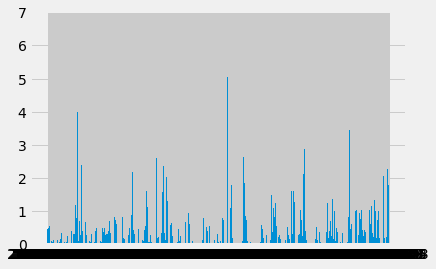

In [199]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_Date = Session.execute("SELECT MAX(date) FROM Measurement").fetchall()[0][0]
date_year_ago = dt.datetime.strptime(last_Date, "%Y-%m-%d")
date_year_ago = date_year_ago - timedelta(days=365)
date_year_ago = date_year_ago.strftime("%Y-%m-%d")

print(date_year_ago)
PRCP_data = Session.query(Measurement.date,Measurement.prcp)\
                          .filter(Measurement.date <= last_Date)\
                          .filter(Measurement.date >= date_year_ago)\
                          .order_by(Measurement.date.desc()).all()
date_Col = []
pec_Col = []

for d in PRCP_data:
    date_Col.append(d[0])
    pec_Col.append(d[1])
df = pd.DataFrame(list(zip(date_Col, pec_Col)),
               columns =['Date', 'Percipitation'])


# Calculate the date one year from the last date in data set.
plt.bar(df["Date"],df["Percipitation"])
plt.show()


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




In [213]:
# Use Pandas to calcualte the summary statistics for the precipitation data
col_names = ['mean','median','var','std']
sum_df = pd.DataFrame(columns = col_names)
mean = df['Percipitation' ].mean()
median = df['Percipitation' ].median()
std = df['Percipitation' ].std()
print("Mean: " + str(mean))
print("Median: " + str(median))
print("STD: " + str(std))



Mean: 0.17727857496288965
Median: 0.02
STD: 0.4611895038877035


# Exploratory Station Analysis

In [223]:
# Design a query to calculate the total number stations in the dataset
PRCP_data = Session.query(Station.station)
station_list = []
for stations in PRCP_data:
    station_list.append(stations[0])

print(np.unique(station_list).size)


9


In [224]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
PRCP_data = Session.query(Measurement.station).all()
station_list = []
for stations in PRCP_data:
    station_list.append(stations[0])
unq_stations = np.unique(station_list)
station_dict = {}
for s in unq_stations:
    station_dict[s] = 0
for s in station_list:
    station_dict[s] = station_dict[s] + 1
print(station_dict)



{'USC00511918': 1979, 'USC00513117': 2709, 'USC00514830': 2202, 'USC00516128': 2612, 'USC00517948': 1372, 'USC00518838': 511, 'USC00519281': 2772, 'USC00519397': 2724, 'USC00519523': 2669}


In [238]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max_station_count = 0
most_active = ""
for unq in unq_stations:
    if station_dict[unq] > max_station_count:
        max_station_count = station_dict[unq]
        most_active = unq

PRCP_data = Session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == most_active)
temp_list = []
for t in PRCP_data:
    temp_list.append(t[1])
print("Max:" + str(max(temp_list)))
print("min:" + str(min(temp_list)))
print("Average:" + str(sum(temp_list) / len(temp_list)))





Max:85.0
min:54.0
Average:71.66378066378067


2009-01-01


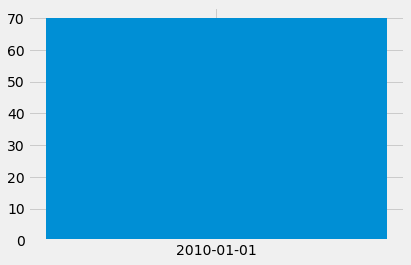

In [246]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
PRCP_data = Session.query(Measurement.date)\
    .filter(Measurement.station == most_active).order_by(Measurement.date.asc()).all()
last_Date = PRCP_data[0][0]
date_year_ago = dt.datetime.strptime(last_Date, "%Y-%m-%d")
date_year_ago = date_year_ago - timedelta(days=365)
date_year_ago = date_year_ago.strftime("%Y-%m-%d")

print(date_year_ago)
PRCP_data = Session.query(Measurement.date,Measurement.tobs)\
                        .filter(Measurement.station == most_active)\
                        .filter(Measurement.date <= last_Date)\
                        .filter(Measurement.date >= date_year_ago)\
                        .order_by(Measurement.date.desc()).all()
date_Col = []
tobs_Col = []

for d in PRCP_data:
    date_Col.append(d[0])
    tobs_Col.append(d[1])
df = pd.DataFrame(list(zip(date_Col, tobs_Col)),
               columns =['Date', 'temp'])


plt.bar(df["Date"],df["temp"])
plt.show()
                        

# Close session

In [230]:
# Close Session
session.close()

NameError: name 'session' is not defined